In [1]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
from os import path
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.metrics import accuracy_score
import pandas as pd

my_model  = 'C:/Users/rossm/Downloads/VGGblock2_99-20ep.h5'
# load model
model = load_model(my_model)
# summarize model.
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_7 (Functional)         (None, 8, 8, 128)         260160    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 2, 256)         0         
_________________________________________________________________
global_average_pooling2d_8 ( (None, 256)              

In [3]:
test_images = "E:\TrafficSigns"
test_data = "E:/TrafficSigns/Test.csv"
data_dir = 'E:/TrafficSigns'
train_path = 'E:/TrafficSigns/Train'
test_path = 'E:/TrafficSigns/'
IMG_HEIGHT = 32
IMG_WIDTH = 32


In [4]:

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(32, 32))
    output.append(np.array(image))

X_test=np.array(output)
#pred = model.predict_classes(X_test)
pred = np.argmax(model.predict(X_test), axis=-1)
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  95.37608867775138


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

In [21]:
cm = confusion_matrix(test_labels,  pred, )

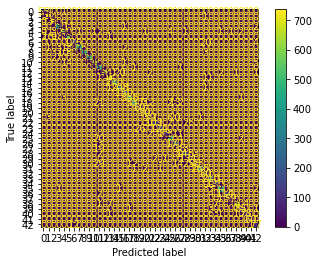

In [22]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [5]:
Y_test 

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [6]:
len(test_labels)

12630

In [7]:
test_images

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [8]:
output

[array([[[115, 138, 173],
         [116, 137, 169],
         [119, 137, 172],
         ...,
         [ 89, 103, 130],
         [ 86, 110, 135],
         [ 63,  82, 105]],
 
        [[116, 143, 177],
         [115, 140, 174],
         [117, 141, 174],
         ...,
         [118, 142, 176],
         [120, 141, 173],
         [120, 139, 171]],
 
        [[118, 141, 173],
         [117, 142, 175],
         [113, 140, 172],
         ...,
         [120, 144, 180],
         [122, 144, 179],
         [118, 142, 177]],
 
        ...,
 
        [[117, 137, 167],
         [114, 134, 163],
         [118, 136, 164],
         ...,
         [116, 139, 171],
         [116, 136, 169],
         [119, 140, 173]],
 
        [[116, 136, 167],
         [114, 134, 168],
         [113, 131, 164],
         ...,
         [112, 135, 167],
         [117, 136, 165],
         [114, 140, 168]],
 
        [[112, 135, 168],
         [110, 135, 165],
         [124, 136, 165],
         ...,
         [116, 139, 167],
  

## test on unseen images

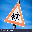

In [9]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('C:/Users/rossm/Downloads/images (4).jfif', target_size=(32, 32))
image

In [10]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [11]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [12]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [13]:
yhat = model.predict(image)

In [14]:
yhat

array([[7.9508929e-05, 3.5798473e-03, 6.2148231e-03, 4.8743240e-03,
        1.3336890e-03, 2.1331005e-03, 7.0167203e-03, 8.5376034e-04,
        3.0286463e-03, 1.2725921e-02, 1.7863298e-03, 2.4466629e-01,
        3.5270538e-02, 1.3339027e-02, 1.3163138e-02, 7.6646160e-05,
        8.9027230e-03, 2.4824392e-02, 4.5678806e-02, 1.0350305e-01,
        6.1478641e-02, 5.7298593e-02, 7.5034529e-04, 4.0454257e-02,
        1.3098415e-03, 3.9964146e-03, 4.7193211e-02, 4.6695932e-03,
        8.6360257e-03, 1.6871712e-04, 4.1943458e-03, 1.5022726e-02,
        4.9991463e-03, 2.3790302e-02, 2.7700802e-03, 1.5071692e-02,
        6.3326978e-03, 2.5852108e-02, 9.3293279e-02, 2.0756915e-02,
        1.4045562e-02, 9.3435897e-03, 5.5207284e-03]], dtype=float32)

In [15]:
maxElement = np.argmax(yhat)
#classID = label.get(str(maxElement)) -1
print("If you are sure this is a German traffic sign, I am",round(yhat[0][maxElement]*100),"% sure it is sign type:",maxElement)


If you are sure this is a German traffic sign, I am 24 % sure it is sign type: 11
